In [1]:
import openai
import pennylane as qml
from PIL import Image
import numpy as np

In [2]:
from key import api_key

In [3]:
from openai import OpenAI

client = OpenAI(api_key=api_key)

def prob_image_arr(arr, openai_api_key):
    # Use OpenAI API to interpret the text
    openai.api_key = openai_api_key

    try:
        response = client.chat.completions.create(
            model="gpt-3.5-turbo",
            messages=[
            #   {
            #      "role": "system",
            #      "content": "The model is tasked with analyzing a 2D binary array. It should output '1' if the '1's in the array form a perfect rectangle, without any breaks or irregularities. If the '1's do not form a perfect rectangle, the model should output '0'. This binary output should be based solely on the geometric arrangement of '1's within the array."
            #   },
            {
             "role": "system",
               "content": "The model is tasked to receive a 2D binary array consisting of 0s and 1s, with the 1s forming a specific shape. It should analyze this shape and calculate a score from 0 to 1 that indicates how closely this shape resembles a rectangle. A score of 1 denotes an exact rectangle, while a score of 0 indicates no resemblance to a rectangle. The model should focus on the spatial arrangement and continuity of the 1s to determine this score. The output should only be the score with a single number as output without any extra text as explanation."

            # "content": "The model's task is to analyze a 2D binary array and provide a numerical score between 0 and 1. This score represents how closely the '1's in the array resemble a rectangle, with 1 being a perfect rectangle and 0 indicating no resemblance. The model should output only the score, without any accompanying explanation."
            },
            #   {
            #      "role": "system",
            #      "content": "The model is tasked with analyzing a 2D binary array and providing a score between 0 and 1. This score should reflect how closely the arrangement of '1's within the array resembles a rectangle. A score of 1 indicates a perfect rectangle, while a score closer to 0 suggests less resemblance to a rectangle. The model should consider factors such as the continuity, alignment, and proportion of '1's in determining this score."
            #   },
              {"role": "user", "content": f"{arr}"}
            ]
        )
        # print(response)
        content = content = response.choices[0].message.content
        return content
    except Exception as e:
        return f"Error in OpenAI API call: {e}"


In [4]:
# is_arr = prob_image_arr(input_arr, api_key)
# print(is_arr)

In [5]:
import pennylane as qml
from scipy.optimize import minimize
# from pennylane import numpy as np




In [6]:
n_qubits = 8
dev = qml.device('default.qubit', wires=n_qubits)

In [7]:
def find_n_largest_numbers(arr, n):
    # Find the indices of the n largest elements
    indices = np.argsort(arr)[-n:]
    # Find the n largest elements
    largest_elements = arr[indices]
    return largest_elements, indices

def indices_to_binary(indices):
    # Convert each index to binary and ensure it's 8 bits
    return [format(index, f'0{n_qubits}b') for index in indices]

def int_to_binary(n, digits):
    binary_str = format(n, 'b')
    # Pad the binary string with leading zeros to ensure it has 'digits' length
    return binary_str.zfill(digits)

In [8]:
# Define the quantum circuit
@qml.qnode(dev)
def circuit(param,index):
    index = int_to_binary(index,n_qubits)
    for i, char in enumerate(index):
        if(char=='1'):
            qml.PauliX(wires=i)
        # qml.Hadamard(wires=i)
            
    qml.StronglyEntanglingLayers(weights=param, wires=range(n_qubits))
    # qml.BasicEntanglerLayers(weights=param, wires=range(n_qubits))
    # return qml.probs(wires=range(n_qubits))
    out = [qml.expval(qml.PauliZ(0)),qml.expval(qml.PauliZ(1)),qml.expval(qml.PauliZ(2)),qml.expval(qml.PauliZ(3)),qml.expval(qml.PauliZ(4)),qml.expval(qml.PauliZ(5)),qml.expval(qml.PauliZ(6)),qml.expval(qml.PauliZ(7))]
    # out = np.array(out)
    return out


In [9]:
def convert_to_int(nested_list):
    return [[int(element) for element in sublist] for sublist in nested_list]

def binary_array_to_png_and_display(binary_array, scale_factor=10):
    # binary_array = convert_to_int(binary_array)
    # Convert the binary array to a numpy array with values 0 and 255
    image_array = np.array(binary_array) * 255

    # Create an image object from the numpy array
    image = Image.fromarray(np.uint8(image_array), 'L')

    # Scale the image
    original_size = image.size
    scaled_size = tuple([dimension * scale_factor for dimension in original_size])
    scaled_image = image.resize(scaled_size, Image.NEAREST)
    display(scaled_image)


In [10]:
def feature_map(input_arr):
    """Flatten the 2D binary array into a 1D feature map."""
    return [item for sublist in input_arr for item in sublist]

def cosine_similarity(vec1, vec2):
    """Calculate the cosine similarity between two vectors."""
    vec1, vec2 = np.array(vec1), np.array(vec2)
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    if(norm_vec2*norm_vec1==0): return 0
    similarity = dot_product / (norm_vec1 * norm_vec2)
    return similarity

In [11]:
a = int_to_binary(4,5)
for i, char in enumerate(a):
    if(char=='1'):
        print(True)

True


In [12]:
# smiley_pattern = np.array([
#         [0, 0, 0, 0, 0, 0, 0, 0],
#         [0, 0, 1, 0, 0, 1, 0, 0],
#         [0, 0, 0, 0, 0, 0, 0, 0],
#         [0, 1, 0, 0, 0, 0, 1, 0],
#         [0, 0, 1, 1, 1, 1, 0, 0],
#         [0, 0, 0, 0, 0, 0, 0, 0],
#         [0, 0, 0, 0, 0, 0, 0, 0],
#         [0, 0, 0, 0, 0, 0, 0, 0]
#     ])

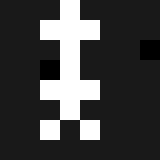

In [13]:

smiley_pattern = np.array([ 
        [0.1,0.1,0.1, 1,0.1,0.1,0.1,0.1],
        [0.1,0.1, 1, 1,1,0.1,0.1,0.1],
        [0.1,0.1,0.1, 1,0.1,0.1,0.1,0 ],
        [0.1,0.1,0, 1,0.1,0.1,0.1,0.1],
        [0.1,0.1, 1, 1, 1,0.1,0.1,0.1],
        [0.1,0.1,0.1, 1,0.1,0.1,0.1,0.1],
        [0.1,0.1, 1,0.1, 1,0.1,0.1,0.1],
        [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]])
binary_array_to_png_and_display(smiley_pattern,scale_factor=20)

smiley_pattern_vec = feature_map(smiley_pattern)

0: ────╭StronglyEntanglingLayers(M0)─┤  <Z>
1: ────├StronglyEntanglingLayers(M0)─┤  <Z>
2: ────├StronglyEntanglingLayers(M0)─┤  <Z>
3: ────├StronglyEntanglingLayers(M0)─┤  <Z>
4: ────├StronglyEntanglingLayers(M0)─┤  <Z>
5: ────├StronglyEntanglingLayers(M0)─┤  <Z>
6: ────├StronglyEntanglingLayers(M0)─┤  <Z>
7: ──X─╰StronglyEntanglingLayers(M0)─┤  <Z>
M0 = 
[[[0.21728347 0.22661026 0.18346991]
  [0.65025331 0.45798072 0.99196332]
  [0.92445051 0.98134876 0.99326668]
  [0.21117474 0.94111006 0.62946817]
  [0.29647469 0.91238053 0.74133312]
  [0.78058736 0.8173234  0.29557538]
  [0.21301726 0.5791373  0.36754865]
  [0.11667549 0.20848709 0.49037179]]

 [[0.91433641 0.96594108 0.06172348]
  [0.53579923 0.04062359 0.69880672]
  [0.7637715  0.8676014  0.80547334]
  [0.31695388 0.24492066 0.22696406]
  [0.5154822  0.80202935 0.70746506]
  [0.01386552 0.64902496 0.81260648]
  [0.2843082  0.03394548 0.35469211]
  [0.77180393 0.06518451 0.18542903]]

 [[0.79622073 0.85662211 0.6739004 ]
  [0.8420

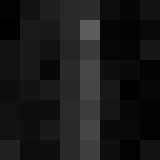

Current loss: 0.2700084298858362


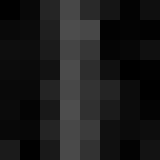

Current loss: 0.18331801822273808


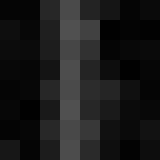

Current loss: 0.1709483579899299


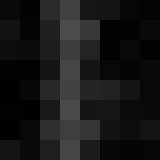

Current loss: 0.15209491208986714


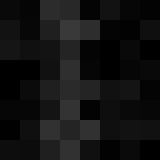

Current loss: 0.14028376151697375


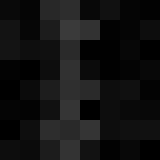

Current loss: 0.1254960895835997


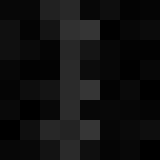

Current loss: 0.11527271354788549


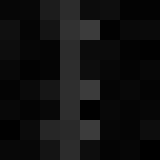

Current loss: 0.1021934584988824


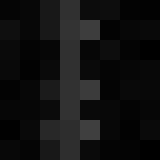

Current loss: 0.09276108211845491


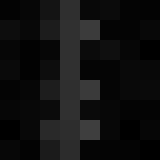

Current loss: 0.0857262530053331


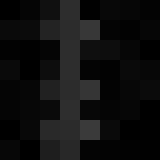

Current loss: 0.07998482360009995


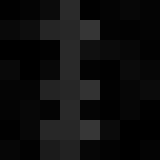

Current loss: 0.07315708018285871


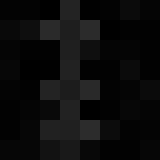

Current loss: 0.0664493720399787


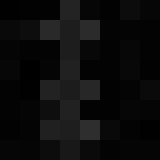

Current loss: 0.060169198905031474


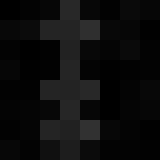

Current loss: 0.05532879379587208


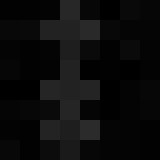

Current loss: 0.05005290020950848


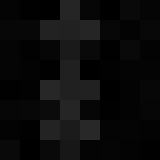

Current loss: 0.046637223154935015


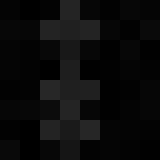

Current loss: 0.044992910732514435


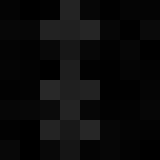

Current loss: 0.04252179669892764


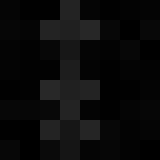

Current loss: 0.039333455934083994


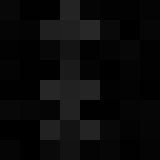

Current loss: 0.03728235095458654


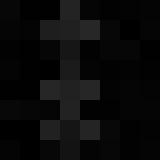

Current loss: 0.03519450802425439


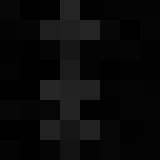

Current loss: 0.03339785805680884


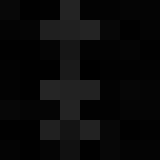

Current loss: 0.031967451689794535


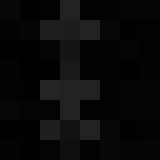

Current loss: 0.03004491067899806


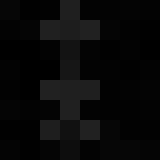

Current loss: 0.028105303203274423


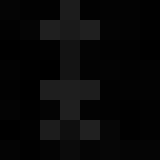

Current loss: 0.02575631131571854


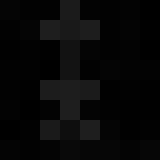

Current loss: 0.024852596461983123


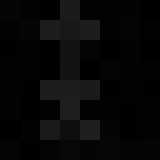

Current loss: 0.023269868610770184


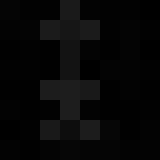

Current loss: 0.020892833112617026


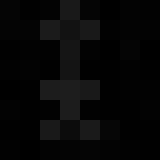

Current loss: 0.019303404031720595


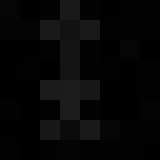

Current loss: 0.01739422050501238


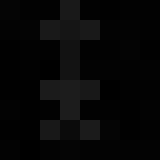

Current loss: 0.016520109631738666


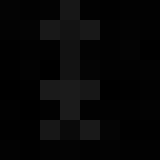

Current loss: 0.015604983059432254


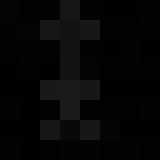

Current loss: 0.014607270740793932


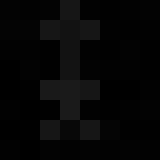

Current loss: 0.013277923714416828


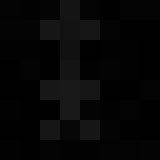

Current loss: 0.012521638253499612


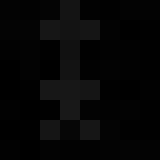

Current loss: 0.011709839565059332


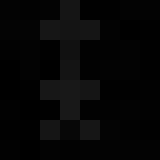

Current loss: 0.010673074136863248


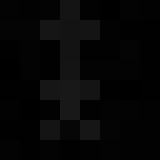

Current loss: 0.009154938293499781


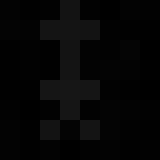

Current loss: 0.00828956839190731


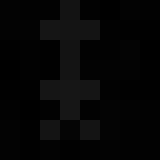

Current loss: 0.007280255473445241


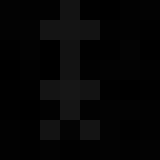

Current loss: 0.006648296604709114


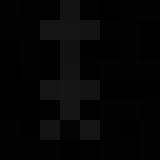

Current loss: 0.005656115584438015


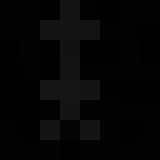

Current loss: 0.004333108684031695


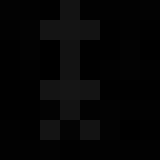

Current loss: 0.003769088463130843


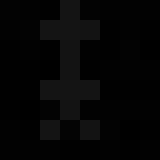

Current loss: 0.00329319709093312


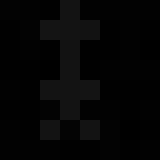

Current loss: 0.002915418893106203


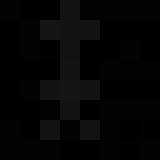

Current loss: 0.002494212936573592


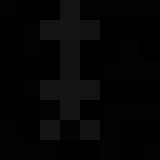

Current loss: 0.002171014200146315


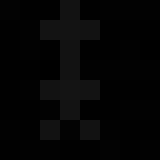

Current loss: 0.001982465810165479


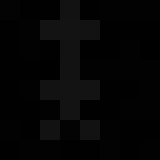

Current loss: 0.001742392982652774


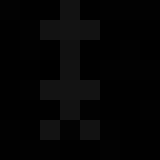

Current loss: 0.0016085567459076522


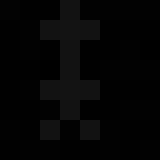

Current loss: 0.0014559138356254886


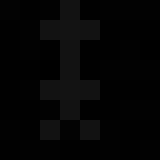

Current loss: 0.0013412764311131475


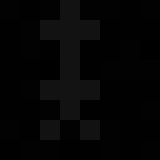

Current loss: 0.0011869261279235932


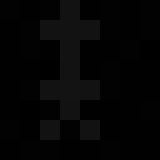

Current loss: 0.0010269901260003822


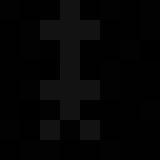

Current loss: 0.0009078101213071399


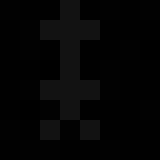

Current loss: 0.0008023758529291936


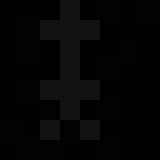

Current loss: 0.0007312194400924676


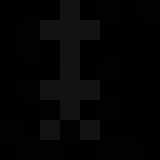

Current loss: 0.00066296865925497


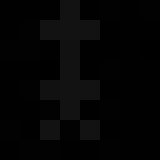

Current loss: 0.000576695299593255


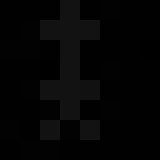

Current loss: 0.0004804623902663341


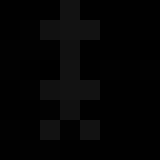

Current loss: 0.0004285019818726088


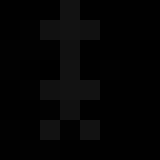

Current loss: 0.00038118326762537347


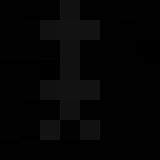

Current loss: 0.00034032851762832994


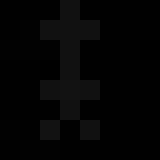

Current loss: 0.00031047939214634557


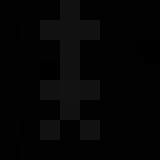

Current loss: 0.0002808123853470512


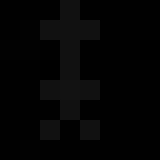

Current loss: 0.00025013593690381697


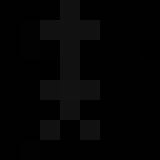

Current loss: 0.00023176113349443472


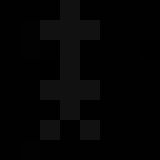

Current loss: 0.0002130435575737888


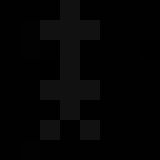

Current loss: 0.00019221150502368722


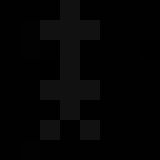

Current loss: 0.00017932473132187265


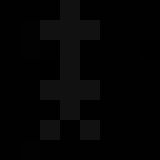

Current loss: 0.0001700304703640132


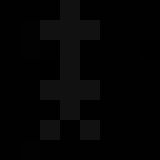

Current loss: 0.00016423831721268378


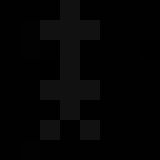

Current loss: 0.00015760758130300978


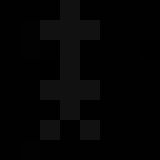

Current loss: 0.00014814974262600256


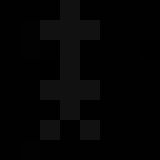

Current loss: 0.00013719395336886375


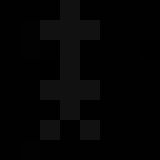

Current loss: 0.00012762959290990583


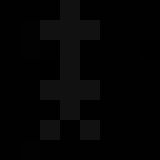

Current loss: 0.00012031397321410342


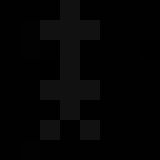

Current loss: 0.00011488333276643559


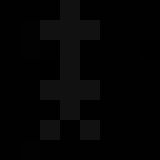

Current loss: 0.00010990162179724816


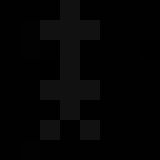

Current loss: 0.00010346501962654742


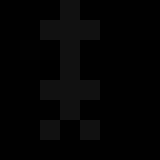

Current loss: 9.595610994317383e-05


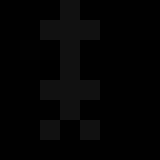

Current loss: 8.837510749715172e-05


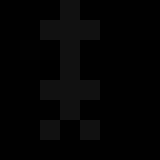

Current loss: 8.187352297717165e-05


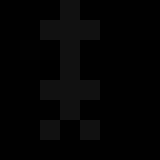

Current loss: 7.670851955343672e-05


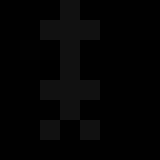

Current loss: 7.247293149792444e-05


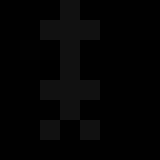

Current loss: 6.85801848946399e-05


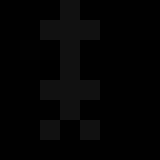

Current loss: 6.463352440200243e-05


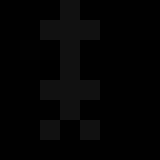

Current loss: 6.117864243326832e-05


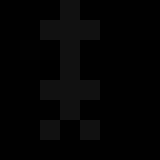

Current loss: 5.8537585264306635e-05


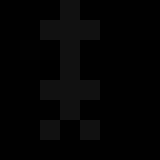

Current loss: 5.641683195189984e-05


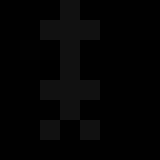

Current loss: 5.422446898495359e-05


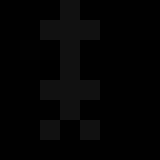

Current loss: 5.1797989091828534e-05


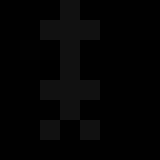

Current loss: 4.930810363157345e-05


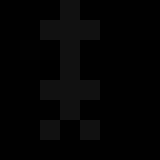

Current loss: 4.728125092856583e-05


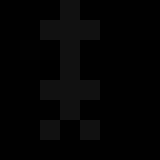

Current loss: 4.543786558885987e-05


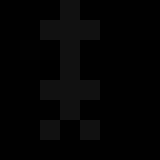

Current loss: 4.3819550522794515e-05


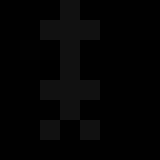

Current loss: 4.2746429354201254e-05


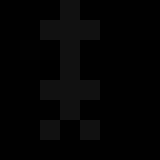

Current loss: 4.189521493280779e-05


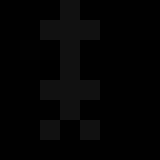

Current loss: 4.1094580523481916e-05


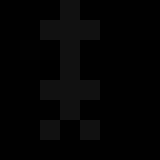

Current loss: 4.043507875761687e-05


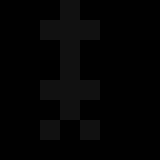

Current loss: 3.981044412315615e-05


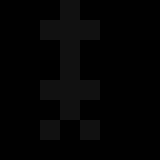

Current loss: 3.9052017611895806e-05


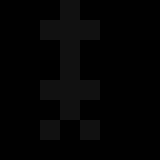

Current loss: 3.807801137101219e-05


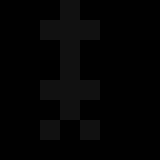

Current loss: 3.702069670385999e-05


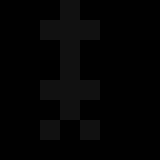

Current loss: 3.603038592536745e-05


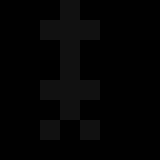

Current loss: 3.4999284389880536e-05


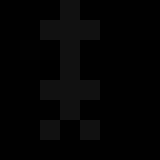

Current loss: 3.3833897661095236e-05


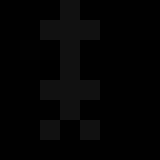

Current loss: 3.2418485783836104e-05


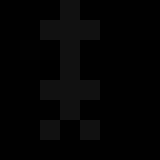

Current loss: 3.0814144877044924e-05


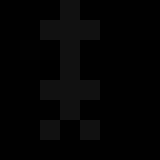

Current loss: 2.9130274208144513e-05


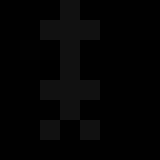

Current loss: 2.7497644854990178e-05


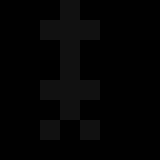

Current loss: 2.598185652180618e-05


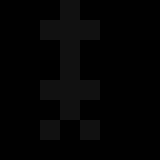

Current loss: 2.4741345783785285e-05


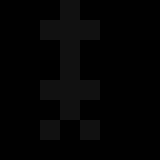

Current loss: 2.379532029295195e-05


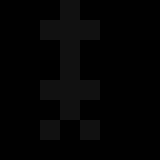

Current loss: 2.3062832186782067e-05


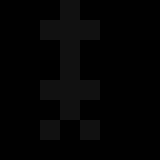

Current loss: 2.238499083728751e-05


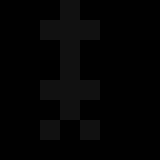

Current loss: 2.1784547511338737e-05


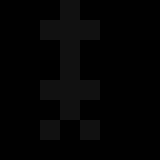

Current loss: 2.108543924461692e-05


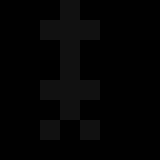

Current loss: 1.9995823029139714e-05


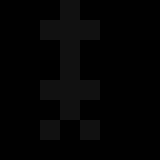

Current loss: 1.8479974459473247e-05


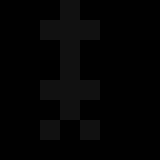

Current loss: 1.7462290676673042e-05


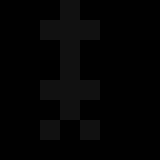

Current loss: 1.674534574191977e-05


KeyboardInterrupt: 

In [14]:
# Define the shape of the parameters
shape_p = qml.StronglyEntanglingLayers.shape(n_layers=4, n_wires=n_qubits)
# shape_p = qml.BasicEntanglerLayers.shape(n_layers=2, n_wires=n_qubits)

# Define the objective function (to be minimized)
def objective(params):
    # print(params)
    original_length = np.prod(shape_p)
    # Extract segments for each set of weights
    weights_p1_flat = params[0 : original_length]
    # print('Param')
    # print(weights_p1_flat)
    # weights_p2_flat = params[original_length : 2*original_length]
    # weights_p3_flat = params[2*original_length : 3*original_length]
    # weights_p4_flat = params[3*original_length : 4*original_length]

    # Reshape each segment
    weights_p1 = weights_p1_flat.reshape(shape_p)
    # print(weights_p1)
    # weights_p2 = weights_p2_flat.reshape(shape_p)
    # weights_p3 = weights_p3_flat.reshape(shape_p)
    # weights_p4 = weights_p4_flat.reshape(shape_p)
    # print('===================')
    image_arr = []
    for i in range(n_qubits):
        arr = circuit(weights_p1,i)
        # largest_elements, indices = find_n_largest_numbers(arr, 1)
        # Convert indices to binary
        # binary_indices = indices_to_binary(indices)
        # print(binary_indices)
        # print(arr)
        image_arr.append(arr)
    image_arr=abs(np.array(image_arr))
    # raise Exception
    # print('==============')
    # print(image_arr)
    # Display the image
    # binary_array_to_png_and_display(image_arr,scale_factor=20)
    # print(prob_image_arr(image_arr,api_key))
    # image_arr = convert_to_int(image_arr)
    # generated_img_feature_map = feature_map(convert_to_int(image_arr))
    generated_img_feature_map = feature_map(image_arr)
    score = cosine_similarity(smiley_pattern_vec,generated_img_feature_map)
    # print(1-score)
    # raise Exception

    
    # print("Largest elements:", largest_elements)
    # print("Indices:", indices)
    # print("Indices in binary:", binary_indices)

    return 1-score

def callback(params):
    original_length = np.prod(shape_p)
    # Extract segments for each set of weights
    weights_p1_flat = params[0 : original_length]
    weights_p1 = weights_p1_flat.reshape(shape_p)
    image_arr = []
    for i in range(n_qubits):
        arr = circuit(weights_p1,i)
        # largest_elements, indices = find_n_largest_numbers(arr, 1)
        # Convert indices to binary
        # binary_indices = indices_to_binary(indices)
        # print(binary_indices)
        # print(arr)
        image_arr.append(arr)
    image_arr=abs(np.array(image_arr))
    binary_array_to_png_and_display(image_arr,scale_factor=20)
    print("Current loss:", objective(params))
    
# Initialize the weights
weights_p1 = np.random.random(size=shape_p)
# weights_p2 = np.random.random(size=shape_p)
# weights_p3 = np.random.random(size=shape_p)
# weights_p4 = np.random.random(size=shape_p)

# Flatten and concatenate the initial parameters
init_params = np.concatenate([weights_p1.flatten()])
print(qml.draw(circuit)(weights_p1,1))

# Optimize using BFGS algorithm
opt = minimize(objective, init_params, method='BFGS',callback=callback)


In [ ]:
print("Optimized Parameters:", opt.x)
print("Optimized Expectation Value:", opt.fun)

original_length = np.prod(shape_p)
params = opt.x
# Extract segments for each set of weights
weights_p1_flat = params[0 : original_length]
# weights_p2_flat = params[original_length : 2*original_length]
# weights_p3_flat = params[2*original_length : 3*original_length]
# weights_p4_flat = params[3*original_length : 4*original_length]

# Reshape each segment
weights_p1 = weights_p1_flat.reshape(shape_p)
# weights_p2 = weights_p2_flat.reshape(shape_p)
# weights_p3 = weights_p3_flat.reshape(shape_p)
# weights_p4 = weights_p4_flat.reshape(shape_p)
# print(circuit_res(weights_p1,weights_p2,weights_p3,weights_p4)

Optimized Parameters: [ 4.75459483e-02  1.12681264e+00  4.65670206e-01  5.43975429e-01
  7.87552432e-01  1.00681247e-01  9.16324732e-01  7.13543967e-01
  9.85406594e-01  9.82370561e-01  1.01139277e+00  1.53931200e-01
  6.94765310e-01  8.54222623e-01  1.34197888e+00  6.50339136e-02
  5.28549071e-01 -1.47752683e-01  5.01503646e-01  3.15492332e-03
  6.84049810e-01  4.35803149e-01  4.31747050e-01 -1.26293671e-01
  5.70910522e-01  1.98454683e-01  2.86635668e-01  4.43695831e-01
  7.01509214e-01  1.86632369e-01  8.36140425e-01  7.77135021e-02
  5.87364960e-01 -1.34263297e-01  1.23789116e+00 -5.74863723e-01
  7.50601378e-01 -4.37660341e-01  9.47980639e-01  8.54305162e-01
 -1.16410399e-04 -2.96067573e-01 -2.86627948e-01  4.39544796e-01
  1.02369410e+00  9.20196276e-01  2.52183166e-02  1.82586832e+00
  9.58352896e-01  6.63167386e-02  8.88674465e-01  6.23999180e-01
 -1.04827328e-02  1.68084919e-01  3.46545690e-01  1.00903440e-02
 -3.36138817e-01  2.49521550e-01 -1.48614593e-03  2.33656253e-02
  5

In [ ]:
res = circuit(weights_p1,0)
# print(res)

In [ ]:

# Example array
arr = res
n = 3

# Find n largest numbers and their indices
largest_elements, indices = find_n_largest_numbers(arr, n)

# Convert indices to binary
binary_indices = indices_to_binary(indices)

print("Largest elements:", largest_elements)
print("Indices:", indices)
print("Indices in binary:", binary_indices)


TypeError: only integer scalar arrays can be converted to a scalar index